In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:
depths = [2, 4, 6]

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, dt.predict(X_train))
    test_acc = accuracy_score(y_test, dt.predict(X_test))

    print(f"Max Depth: {d} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

Max Depth: 2 | Train Acc: 0.9500 | Test Acc: 0.9667
Max Depth: 4 | Train Acc: 0.9750 | Test Acc: 1.0000
Max Depth: 6 | Train Acc: 1.0000 | Test Acc: 1.0000


In [5]:
from sklearn.tree import plot_tree

In [6]:
dt_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_viz.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

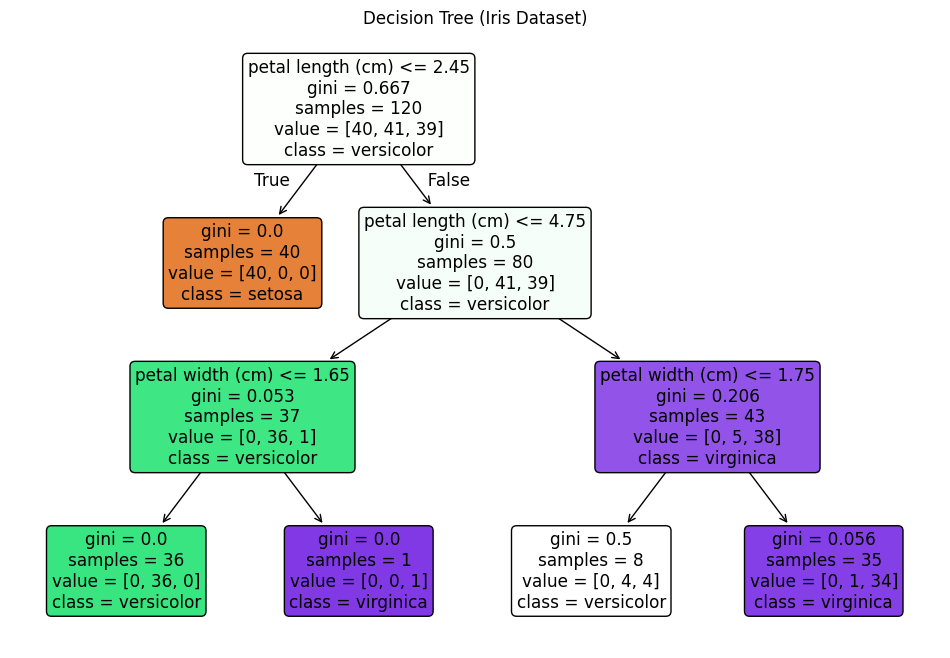

In [7]:
plt.figure(figsize=(12, 8))
plot_tree(dt_viz,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree (Iris Dataset)")
plt.show()

In [11]:
importance = dt_viz.feature_importances_
print("\nFeature Importance (Маңыздылық):")
for name, score in zip(iris.feature_names, importance):
    print(f"{name:20} : {score:.4f}")

# Ең маңыздысын табу
best_feature = iris.feature_names[np.argmax(importance)]
print(f"\nЕң маңызды feature: '{best_feature}'")


Feature Importance (Маңыздылық):
sepal length (cm)    : 0.0000
sepal width (cm)     : 0.0000
petal length (cm)    : 0.9346
petal width (cm)     : 0.0654

Ең маңызды feature: 'petal length (cm)'


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))

In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

print(f"Decision Tree Accuracy:  {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")


Decision Tree Accuracy:  1.0000
Random Forest Accuracy: 1.0000
